In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dense
from keras.utils import pad_sequences
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


#### Note: we dont use normal images for training in this case and we use the image  from the "Result_... "csv instead.

In [2]:
target_size=(100, 100)

In [3]:
# Preprocess the images and labels
def preprocess_image(image_path):
    image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image.astype('float32')
    image = image / 255.0
    return image

In [4]:
X = np.zeros((50000, 100, 100, 3), dtype='float32')
y = np.zeros((50000))

In [5]:
df_subdural = pd.read_csv("SubduralHemorrhageRemovedFlags.csv")
df_epidural = pd.read_csv("EpiduralHemorrhageRemovedFlags.csv")
df_intraparenchymal = pd.read_csv("IntraparenchymalHemorrhageRemovedFlags.csv")
df_subarachnoid = pd.read_csv("SubarachnoidHemorrhageRemovedFlags.csv")
df_multi = pd.read_csv("MultipleHemorrhageRemovedFlags.csv")
df_intraventricular = pd.read_csv("IntraventricularHemorrhageRemovedFlags.csv")

In [6]:
# normal_dir = r"D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\normal\\subdural_window\\"
# normal_data = []

# for filename in os.listdir(normal_dir):
#     if filename.endswith('.jpg'):
#         image = preprocess_image(os.path.join(normal_dir, filename))
#         normal_data.append(image)

In [7]:
subdural_directories = [
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\subdural\\subdural_window\\", 
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\subdural\\brain_bone_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\subdural\\brain_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\subdural\\max_contrast_window\\",
]

subdural_paths = []
for directory in subdural_directories:
    subdural_paths.extend([os.path.join(directory, img_name) for img_name in df_subdural['Origin']])

# subdural_data = np.array([np.mean(preprocess_image(img_path),axis=2).reshape(target_size) for img_path in subdural_paths])
subdural_data = np.array([preprocess_image(img_path) for img_path in subdural_paths])

In [8]:
print(subdural_data.shape)

(3000, 100, 100, 3)


In [9]:
epidural_directories = [
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\epidural\\subdural_window\\", 
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\epidural\\brain_bone_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\epidural\\brain_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\epidural\\max_contrast_window\\",
]

epidural_paths = []
for directory in epidural_directories:
    epidural_paths.extend([os.path.join(directory, img_name) for img_name in df_epidural['Origin']])

epidural_data = np.array([preprocess_image(img_path) for img_path in epidural_paths])

In [10]:
print(epidural_data.shape)

(2436, 100, 100, 3)


In [11]:
intraparenchymal_directories = [
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\intraparenchymal\\subdural_window\\", 
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\intraparenchymal\\brain_bone_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\intraparenchymal\\brain_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\intraparenchymal\\max_contrast_window\\",
]

intraparenchymal_paths = []
for directory in intraparenchymal_directories:
    intraparenchymal_paths.extend([os.path.join(directory, img_name) for img_name in df_intraparenchymal['Origin']])

intraparenchymal_data = np.array([preprocess_image(img_path) for img_path in intraparenchymal_paths])

In [12]:
print(intraparenchymal_data.shape)

(5132, 100, 100, 3)


In [13]:
subarachnoid_directories = [
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\subarachnoid\\subdural_window\\", 
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\subarachnoid\\brain_bone_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\subarachnoid\\brain_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\subarachnoid\\max_contrast_window\\",
]

subarachnoid_paths = []
for directory in subarachnoid_directories:
    subarachnoid_paths.extend([os.path.join(directory, img_name) for img_name in df_subarachnoid['Origin']])

subarachnoid_data = np.array([preprocess_image(img_path) for img_path in subarachnoid_paths])

In [14]:
print(subarachnoid_data.shape)

(4124, 100, 100, 3)


In [15]:
multi_directories = [
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\multi\\subdural_window\\", 
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\multi\\brain_bone_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\multi\\brain_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\multi\\max_contrast_window\\",
]

multi_paths = []
for directory in multi_directories:
    multi_paths.extend([os.path.join(directory, img_name) for img_name in df_multi['Origin']])
    
multi_data = np.array([preprocess_image(img_path) for img_path in multi_paths])

In [16]:
print(multi_data.shape)
print(multi_data.dtype)

(4188, 100, 100, 3)
float32


In [17]:
intraventricular_directories = [
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\intraventricular\\subdural_window\\", 
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\intraventricular\\brain_bone_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\intraventricular\\brain_window\\",
    "D:\\MATH4570\\MatrixMethodsFinal\\XN_Project\\renders\\intraventricular\\max_contrast_window\\",
]

intraventricular_paths = []
for directory in intraventricular_directories:
    intraventricular_paths.extend([os.path.join(directory, img_name) for img_name in df_intraventricular['Origin']])

intraventricular_data = np.array([preprocess_image(img_path) for img_path in intraventricular_paths])

In [18]:
print(intraventricular_data.shape)
print(intraventricular_data.dtype)

(9596, 100, 100, 3)
float32


In [19]:
data = [subdural_data, epidural_data, intraparenchymal_data, subarachnoid_data, multi_data, intraventricular_data]

In [20]:
print(X.shape)
print(X.dtype)
print(y.dtype)

(50000, 100, 100, 3)
float32
float64


In [21]:
index = 0;
# subdural_data
for data in subdural_data: 
    X[index] = data
    y[index] = 0
    index+=1

# epidural_data
for data in epidural_data: 
    X[index] = data
    y[index] = 1
    index+=1
    
# intraparenchymal_data
for data in intraparenchymal_data: 
    X[index] = data
    y[index] = 2
    index+=1
    
# subarachnoid_data
for data in subarachnoid_data: 
    X[index] = data
    y[index] = 3
    index+=1
    
# multi_data
for data in multi_data: 
    X[index] = data
    y[index] = 4
    index+=1
    
# intraventricular_data
for data in intraventricular_data: 
    X[index] = data
    y[index] = 5
    index+=1

In [22]:
print(index)

28476


## 1. Logistic Regression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 100, 100, 3)
(25000, 100, 100, 3)
(25000,)
(25000,)


In [27]:
# Flatten the input images to a 2D format
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Create a Logistic Regression model and fit it to the training data
clf = LogisticRegression(max_iter = 40)
clf.fit(X_train_flat, y_train)

# Evaluate the model on the test data and print the score
score = clf.score(X_test_flat, y_test)
print("Logistic Regression score:", score)

c:\users\victo\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score: 0.67556


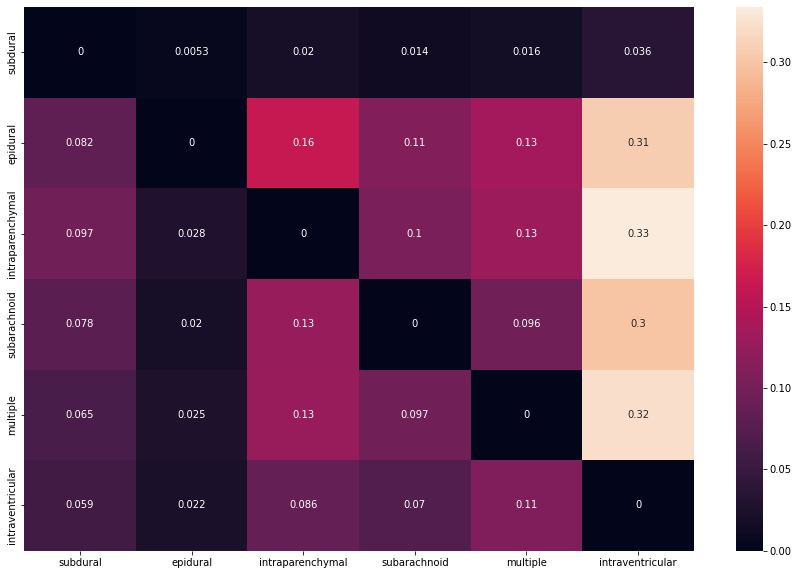

In [28]:
y_predict = clf.predict(X_test_flat)

conf_mx = confusion_matrix(y_test, y_predict)

labels = ["subdural", "epidural", "intraparenchymal", "subarachnoid", "multiple", "intraventricular"]

row_sum = conf_mx.sum(axis=1, keepdims=True)
nconf_mx = conf_mx/row_sum
np.fill_diagonal(nconf_mx,0)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(nconf_mx, annot=True, xticklabels=labels, yticklabels=labels)
plt.show()

In [29]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

clf = LogisticRegression(max_iter = 100)
clf.fit(X_train_flat, y_train)

score = clf.score(X_test_flat, y_test)
print("Logistic Regression score:", score)

c:\users\victo\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score: 0.74672


In [30]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

clf = LogisticRegression(max_iter = 500)
clf.fit(X_train_flat, y_train)

score = clf.score(X_test_flat, y_test)
print("Logistic Regression score:", score)

c:\users\victo\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score: 0.86196


In [31]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train_flat, y_train)

score = clf.score(X_test_flat, y_test)
print("Logistic Regression score:", score)

c:\users\victo\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score: 0.86408


## 2. Convolutional Neural Network

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [33]:
print()
print('Data loaded: train:',len(X_train),', test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)


Data loaded: train: 30000 , test: 10000
X_train: (30000, 100, 100, 3)
y_train: (30000,)
X_test: (10000, 100, 100, 3)
y_test: (10000,)


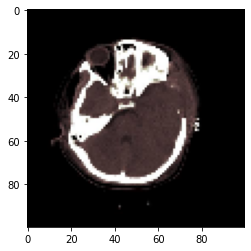

In [34]:
plt.imshow(X_train[10,:,:])

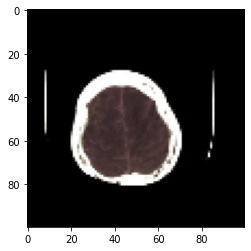

In [35]:
plt.imshow(X_train[106,:,:])

In [36]:
print(np.unique(y_train))
print(np.unique(y_val))

[0. 1. 2. 3. 4. 5.]
[0. 1. 2. 3. 4. 5.]


In [37]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.summary()

num_classes = 6
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=100,
                    verbose=1,
                    validation_data=(X_val, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

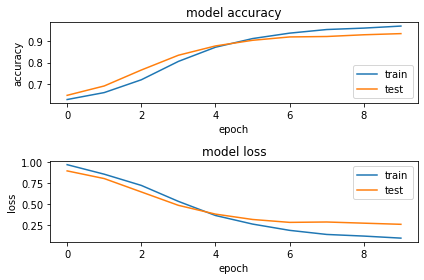

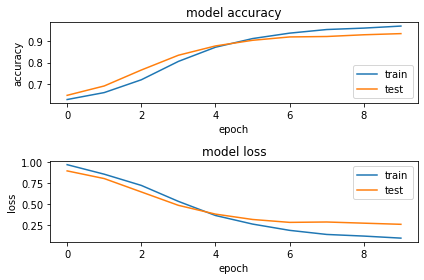

In [38]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [42]:
epochs = 10
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/10
235/235 [==============================] - 135s 573ms/step - loss: 0.0396 - accuracy: 0.9869 - val_loss: 0.2805 - val_accuracy: 0.9448
Epoch 2/10
235/235 [==============================] - 132s 563ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.2864 - val_accuracy: 0.9419
Epoch 3/10
235/235 [==============================] - 124s 527ms/step - loss: 0.0354 - accuracy: 0.9881 - val_loss: 0.2794 - val_accuracy: 0.9445
Epoch 4/10
235/235 [==============================] - 122s 519ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.2718 - val_accuracy: 0.9427
Epoch 5/10
235/235 [==============================] - 123s 522ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 0.3242 - val_accuracy: 0.9419
Epoch 6/10
235/235 [==============================] - 124s 529ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.2831 - val_accuracy: 0.9480
Epoch 7/10
235/235 [==============================] - 126s 537ms/step - loss: 0.0321 - accuracy: 0.9892 - val_loss: 0.2904 -